# Naïve Bayes classification

Naive Bayes is a high bias/low variance classifier that is less likely to overfit small training datasets than a low bias/high variance classifier is (such as kNN or logistic regression). Simple algorithm and converges quickly. Strongly assumes independence (hence, naive).

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import naive_bayes, metrics, model_selection, preprocessing
from utils import plot_decision

## Load and prep the data

In [2]:
# load the iris data
df = pd.read_csv('data/iris.csv')
df['species_label'], _ = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
# select features
y = df['species_label']
X = df[['petal_length', 'petal_width']]

In [4]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# standardize the features
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Train the model and make predictions

In [6]:
# train the model
gnb = naive_bayes.GaussianNB(priors=None)
gnb.fit(X_train_std, y_train)

GaussianNB(priors=None)

In [7]:
# use the trained model to make predictions with the test data
y_pred = gnb.predict(X_test_std)

## Evaluate the model's performance

In [8]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 0.98


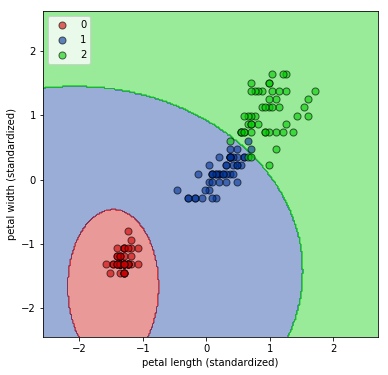

In [9]:
# visualize the model's decision regions to see how it separates the samples
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined_std, y=y_combined, classifier=gnb)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()

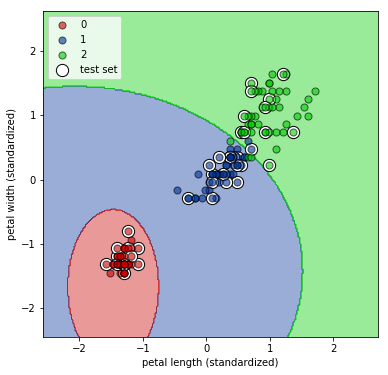

In [10]:
# same thing, but this time identify the points that constituted the test data set
test_idx = range(len(y_train), len(y_combined))
plot_decision(X=X_combined_std, y=y_combined, classifier=gnb, test_idx=test_idx)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')
plt.show()